# Load datas

In [1]:
### General ###
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import vincenty
import seaborn as sns
import collections

### Maps ###
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

### Principal Component Analysis ###
import json
import gzip
from sklearn.decomposition import PCA
from scipy import cluster
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import chi2_contingency, pearsonr
from itertools import combinations
import sys
sys.path.append("lib")
from sklearn import decomposition
from sklearn.manifold import TSNE
from ggplot import *

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)
/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
# load train and test data
df_mess_train = pd.read_csv('datas/mess_train_list.csv') # train set
df_mess_test = pd.read_csv('datas/mess_test_list.csv') # test set
pos_train = pd.read_csv('datas/pos_train_list.csv') # position associated to train set

# Exploratory data analysis

## Explore the two train tables

In [3]:
df_mess_train.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216


In [4]:
df_mess_train.describe()

,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
count,39250.000000,3.925000e+04,39250.000000,39250.000000,3.925000e+04,39250.000000,39250.000000
mean,4533.774752,4.835932e+05,1.043541,-125.863580,1.473368e+12,42.554998,-100.969685
std,2570.495638,9.893140e+04,0.563540,9.226500,5.506910e+09,7.722787,11.522732
min,879.000000,4.732880e+05,0.000000,-155.000000,1.463546e+12,36.053394,-107.463146
25%,2790.000000,4.761230e+05,1.000000,-132.500000,1.468410e+12,39.747448,-105.074287
50%,3559.000000,4.763150e+05,1.000000,-127.333333,1.473444e+12,39.793585,-105.043685
75%,7456.000000,4.766090e+05,1.500000,-121.000000,1.479118e+12,39.838740,-104.998429
max,11951.000000,1.747448e+06,2.000000,-64.000000,1.481143e+12,64.300000,-68.500000


In [5]:
pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [6]:
pos_train.describe()

,lat,lng
count,39250.000000,39250.000000
mean,39.783333,-105.056343
std,0.206262,0.162954
min,35.770683,-107.630679
25%,39.708599,-105.060463
50%,39.776882,-105.039440
75%,39.805279,-105.018730
max,43.140387,-102.094289


## Number of base stations

We might wonder how many base stations there are. This might give us some information on what to expect

In [7]:
listOfBs = np.union1d(np.unique(df_mess_train['bsid']), np.unique(df_mess_test['bsid'])) # determine all Base stations that received at least 1 message

In [8]:
len(listOfBs)

259

We can take a look at the distribution of the number of messages received by the different base stations.

In [9]:
count_bsid_train = np.array(df_mess_train['bsid'])
count_bsid_test = np.array(df_mess_test['bsid'])

# determine all Base stations that received at least 1 message

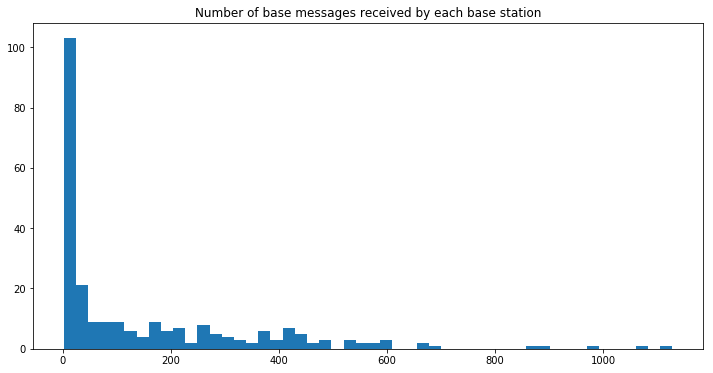

In [10]:
a = count_bsid_train
unique, counts = np.unique(a, return_counts=True)
result_count_bsid = dict(zip(unique, counts))
plt.figure(figsize=(12,6))
plt.hist(counts, bins=50)
plt.title("Number of base messages received by each base station")
plt.show()

With this two distributions we can see which base station is most solicited. We can determine the base station which are the most central

## Device ID

We can also wonder if the devices "id" in the test set are the same than the ones in the train set. This is a rather relevant information, as it will tell us whether we should evalate our performance on the train set on a random split of the data set, or on unique devices never observed before.

In [13]:
df_mess_train['did'].unique()

array([ 473335.,  473953.,  476512.,  476286.,  473438.,  476185.,
        476285.,  476314.,  476306.,  476317.,  476320.,  473502.,
        476318.,  476197.,  476312.,  476316.,  476251.,  476308.,
        473683.,  473796.,  476323.,  476329.,  476321.,  476324.,
        476332.,  476322.,  473864.,  473512.,  473805.,  476327.,
        476325.,  476515.,  476505.,  476517.,  476212.,  476503.,
        476507.,  476611.,  476610.,  476606.,  476604.,  476607.,
        476602.,  476609.,  476600.,  476598.,  476615.,  476521.,
        476525.,  476523.,  476830.,  474181.,  476828.,  474126.,
        476826.,  476853.,  476315.,  474176.,  476852.,  476987.,
        476307.,  476868.,  476833.,  476861.,  473897.,  476276.,
        473902.,  476275.,  476888.,  476891.,  476274.,  476280.,
        476257.,  476210.,  476231.,  474192.,  476225.,  476256.,
        476161.,  476228.,  476835.,  473368.,  473892.,  476883.,
        476889.,  476884.,  476887.,  473899.,  476885.,  4762

In [14]:
df_mess_test['did'].unique()

array([116539., 472504., 472397., 116527., 472851., 473277., 473269.,
       472214., 116525., 472526., 472516., 116331., 472331., 472427.,
       472518., 472293., 473275., 110335., 116519., 472654., 473067.,
       116530., 472960., 116533., 472511., 116339., 472151., 116385.,
       472395., 473266., 473058., 473231., 472493., 116333., 472660.,
       473281., 472066., 472854., 473279., 473071., 473056., 473229.,
       472414., 473066., 116510., 116454., 473259., 116374., 472417.,
       472676., 472533., 473094., 472391., 472646., 473069., 473287.])

In [15]:
np.intersect1d(df_mess_test['did'].unique(),df_mess_train['did'].unique())

array([], dtype=float64)

There are no common devices. This means that the device id should not be used in the train set as a relevant information. We need to drop this column in the feature matrix, and train/test on different sets of devices.


## Distributions

We can now take a look at the distribution of the numerical columns of df_mess_train.

### RSSI

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


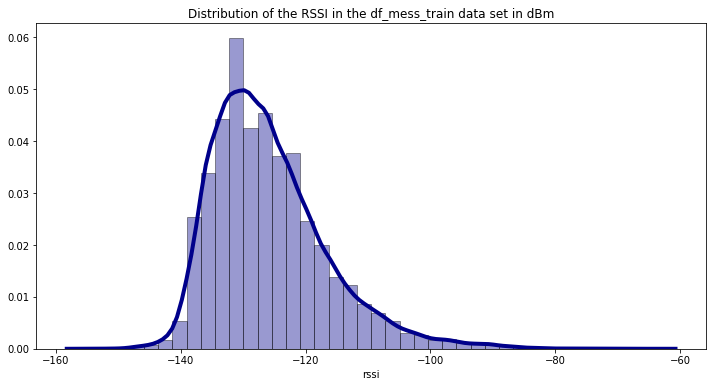

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(df_mess_train['rssi'], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Distribution of the RSSI in the df_mess_train data set in dBm')
plt.show()

### Time_ux

Regarding the time_ux, there are several hypothesis :
- it could be a timestamp at the reception of a signal
- it could be the time difference between the timestamp at which the message was sent and it was received
- it could be the time that loading the message took

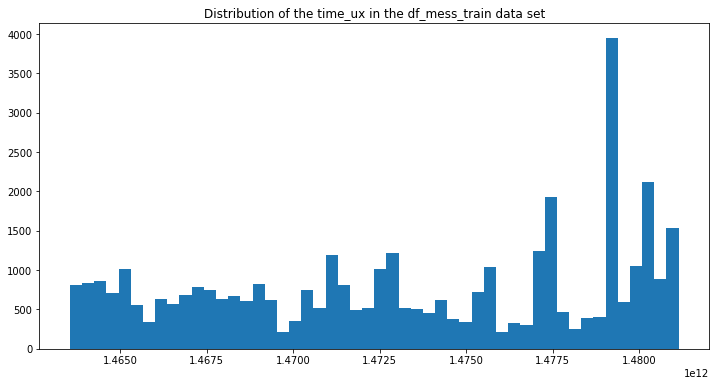

In [40]:
plt.figure(figsize=(12,6))
plt.hist(df_mess_train['time_ux'], bins = 50)
plt.title('Distribution of the time_ux in the df_mess_train data set')
plt.show()

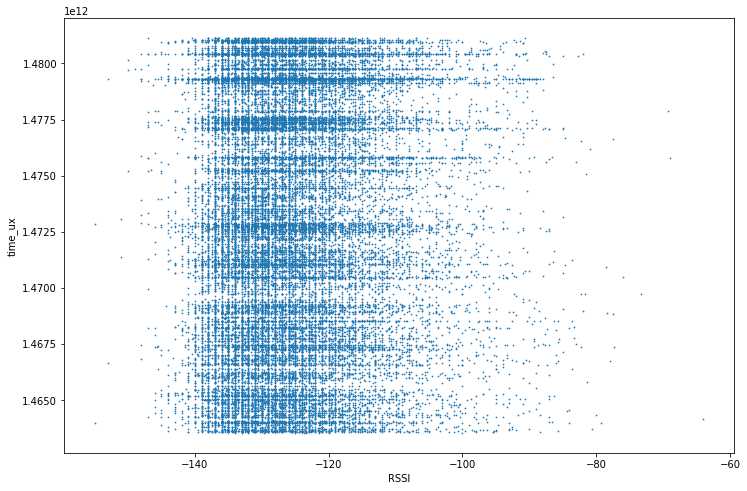

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(df['rssi'], df['time_ux'], s=0.5)
plt.xlabel("RSSI")
plt.ylabel("time_ux")
plt.show()

The RSSI and therefore the distance of the base station to the sensor does not seem to have any relationship with the time_ux.

### Nseq

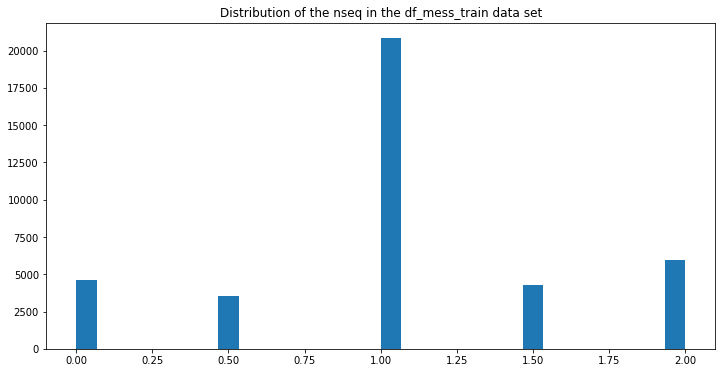

In [18]:
plt.figure(figsize=(12,6))
plt.hist(df_mess_train['nseq'], bins = 30)
plt.title('Distribution of the nseq in the df_mess_train data set')
plt.show()

## Plot values on a map

In [523]:
data = pos_train
#norm = Normalize(data['mag'].min(), data['mag'].max())


map = folium.Map(location=[39.73, -104.958490], zoom_start=5.5)
for eq, eq2 in zip(data.iterrows(), df_mess_train.iterrows()):
    #color = rgb2hex(cm.OrRd(norm(float(eq[1]['mag'])))), fill_color=color, ,popup=eq[1]['place'], ,color=color, radius=4*float(eq[1]['mag']
    folium.CircleMarker(location = [eq[1]['lat'], eq[1]['lng']], radius=1, color='blue').add_to(map)
    folium.CircleMarker(location = [eq2[1]['bs_lat'], eq2[1]['bs_lng']], radius=1, color='red').add_to(map)
map.save('maps/map.html')


In [524]:
%%HTML
<iframe width=100% height=550 src="maps/map.html"></iframe>

The datas are centered in Denver. The base stations are represented in red, and the positions of the messages is shown in blue. We do observe a coherence between the base stations location and the message geolocation. We should control for missing values.

## Missing values

In [121]:
df_mess_train.isna().sum()

messid     0
bsid       0
did        0
nseq       0
rssi       0
time_ux    0
bs_lat     0
bs_lng     0
dtype: int64

One quite big question is to see whether a given message has been received by all the base stations around it, or whether some of the stations did never receive the message.

Let's take a given message which has been received by a certain number of base stations:

In [19]:
df = pd.concat([df_mess_train, pos_train], axis=1)

In [123]:
dat = df[df['messid'] == '583d85b2cf554f7e3a24081e']
dat.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng
35729,583d85b2cf554f7e3a24081e,1092,476829.0,0.0,-140.000000,1.480427e+12,64.300000,-68.500000,39.706676,-105.018898
35730,583d85b2cf554f7e3a24081e,1264,476829.0,0.5,-135.000000,1.480427e+12,39.747139,-105.085313,39.706676,-105.018898
35731,583d85b2cf554f7e3a24081e,1268,476829.0,1.0,-138.333333,1.480427e+12,39.719536,-104.924702,39.706676,-105.018898
35732,583d85b2cf554f7e3a24081e,1661,476829.0,0.0,-133.000000,1.480427e+12,64.300000,-68.500000,39.706676,-105.018898
35733,583d85b2cf554f7e3a24081e,1743,476829.0,1.0,-124.000000,1.480427e+12,64.300000,-68.500000,39.706676,-105.018898


We want to plot the bs_lat and bs_lng of all the base stations vs all the base stations in the df. We need to identify the unique coordinates of each base station first.

In [124]:
base_stations = df[['bsid', 'bs_lat', 'bs_lng']]

In [125]:
base_stations = base_stations.drop_duplicates()

In [530]:
map = folium.Map(location=[39.73, -104.958490], zoom_start=9)
for eq, eq2 in zip(base_stations.iterrows(), dat.iterrows()):
    #color = rgb2hex(cm.OrRd(norm(float(eq[1]['mag'])))), fill_color=color, ,popup=eq[1]['place'], ,color=color, radius=4*float(eq[1]['mag']
    folium.CircleMarker(location = [eq[1]['bs_lat'], eq[1]['bs_lng']], radius=1,color='blue'
                    ).add_to(map)
    folium.CircleMarker(location = [eq2[1]['bs_lat'], eq2[1]['bs_lng']], radius=1,color='red'
                    ).add_to(map)
map.save('maps/map_message.html')

In [531]:
%%HTML
<iframe width=100% height=550 src="maps/map_message.html"></iframe>

We do observe something pretty interesting here :
- in red, the base stations which received the message 583d85b2cf554f7e3a24081e
- in blue, all the base stations in this area

We can pretty easily see that we are only using partial information here. It is possible that other base stations have not received the message indeed due to the position of the station for example. However, using less information than available is a shame and should be corrected. Therefore, for a given observation, we will draw a square between the two furthest base stations. All stations in between will be considered as having received the message. The RSSI of the station will be estimated by a simple KNN. This step will be done in the feature matrix.

## Outliers

### Check for the geolocation consistency

We can also control for the min and the max of the goelocation of the base stations and the exact locations to control for outliers. 

In [126]:
df_mess_train['bs_lat'].describe()

count    39250.000000
mean        42.554998
std          7.722787
min         36.053394
25%         39.747448
50%         39.793585
75%         39.838740
max         64.300000
Name: bs_lat, dtype: float64

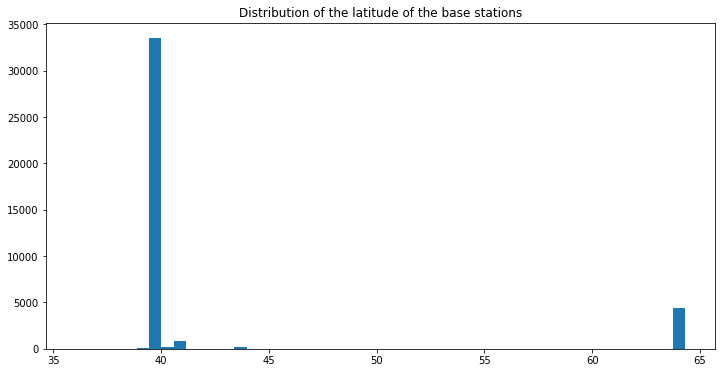

In [127]:
plt.figure(figsize=(12,6))
plt.title('Distribution of the latitude of the base stations')
plt.hist(df_mess_train['bs_lat'], bins=50)
plt.show()

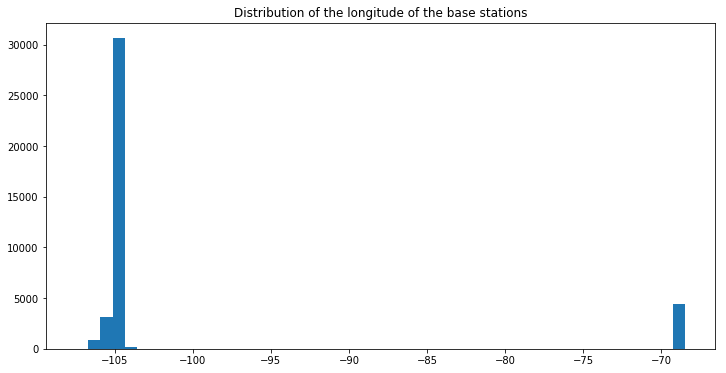

In [128]:
plt.figure(figsize=(12,6))
plt.title('Distribution of the longitude of the base stations')
plt.hist(df_mess_train['bs_lng'], bins=50)
plt.show()

There are several outlying base stations that appear to be pretty far away from out barycenter. We need to evaluate how dependent our datas are on these base stations. Firstly, are there outliers too for the true geolocation ?

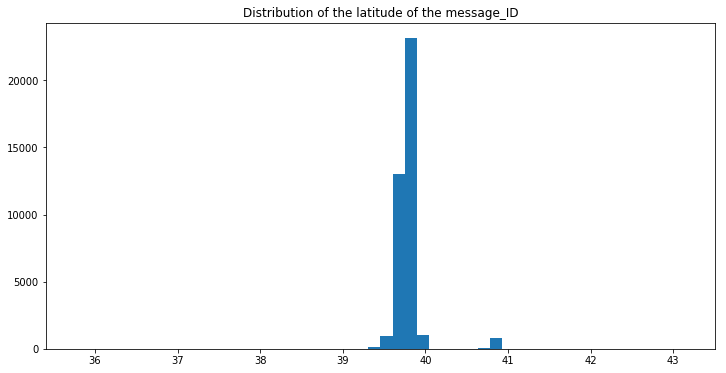

In [129]:
plt.figure(figsize=(12,6))
plt.title('Distribution of the latitude of the message_ID')
plt.hist(pos_train['lat'], bins=50)
plt.show()

In [130]:
pos_train['lat'].describe()

count    39250.000000
mean        39.783333
std          0.206262
min         35.770683
25%         39.708599
50%         39.776882
75%         39.805279
max         43.140387
Name: lat, dtype: float64

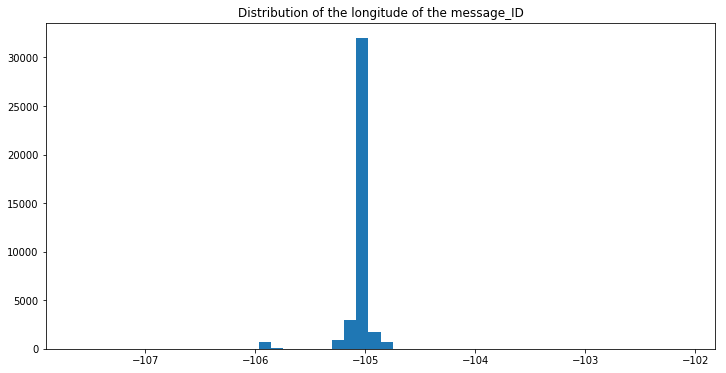

In [131]:
plt.figure(figsize=(12,6))
plt.title('Distribution of the longitude of the message_ID')
plt.hist(pos_train['lng'], bins=50)
plt.show()

In [132]:
pos_train['lng'].describe()

count    39250.000000
mean      -105.056343
std          0.162954
min       -107.630679
25%       -105.060463
50%       -105.039440
75%       -105.018730
max       -102.094289
Name: lng, dtype: float64

There are not true locations around the outlying base stations locations. These base stations are therefore real outliers. To make sure that we can drop them, we should check how many messages have uniquely been received by these base stations.

### Identify the outliers

In [20]:
lat_thr = 43.002887
lng_thr = -104.052944
lat_mean = pos_train['lat'].mean()
lng_mean = pos_train['lng'].mean()

# 39.783333
# -105.056343

In [21]:
outliers = []
for i in range(0,39250) :
    if (df_mess_train.iloc[i]['bs_lng'] > lng_thr and df_mess_train.iloc[i]['bs_lat'] > lat_thr) :
        outliers.append(df_mess_train.iloc[i]['bsid'])

In [22]:
len(outliers)

4567

In [23]:
out = list(set(outliers))
print(len(out))
out

37


[4993,
 8449,
 8451,
 1796,
 3848,
 2707,
 4123,
 4129,
 8355,
 1443,
 10151,
 3501,
 3630,
 11951,
 4013,
 10162,
 9784,
 1594,
 4156,
 1854,
 1092,
 1743,
 7248,
 11007,
 7508,
 3933,
 4959,
 1772,
 8560,
 2800,
 2803,
 2293,
 10999,
 2808,
 4987,
 1661,
 2943]

There is overall 35 base stations that are outliers.

We know that there is no message true position close to the outlying base stations. Those base stations have received a message that is in fact much further. The one way to limit the error here is to set all outlying base stations locations to the barycenter of all the base stations.

We can easily update the values of those base stations and set them to the barycenter of the map. We should avoid dropping such values since the test set contains several outliers too and we have to predict a value even for those points.

In [137]:
for o in out :
    df_mess_train.loc[df_mess_train['bsid'] == o, 'bs_lat'] = lat_mean
    df_mess_train.loc[df_mess_train['bsid'] == o, 'bs_lng'] = lng_mean

In [71]:
map = folium.Map(location=[50.73, -80.958490], zoom_start=3)
for eq in df_mess_train.iterrows():
    folium.CircleMarker(location = [eq[1]['bs_lat'], eq[1]['bs_lng']], radius=5,color='blue'
                    ).add_to(map)
map.save('maps/map_outliers_corrected.html')

In [72]:
%%HTML
<iframe width=100% height=550 src="maps/map_outliers_corrected.html"></iframe>

The outlier issue has been corrected now. Let's apply the same correction to the test set.

In [24]:
outliers = []
for i in range(0,29286) :
    if (df_mess_test.iloc[i]['bs_lng'] > lng_thr and df_mess_test.iloc[i]['bs_lat'] > lat_thr) :
        outliers.append(df_mess_test.iloc[i]['bsid'])

        out = list(set(outliers))
for o in out :
    df_mess_test.loc[df_mess_test['bsid'] == o, 'bs_lat'] = lat_mean
    df_mess_test.loc[df_mess_test['bsid'] == o, 'bs_lng'] = lng_mean

In [25]:
df_mess_train.to_csv('datas/df_mess_train_2.csv')
df_mess_test.to_csv('datas/df_mess_test_2.csv')

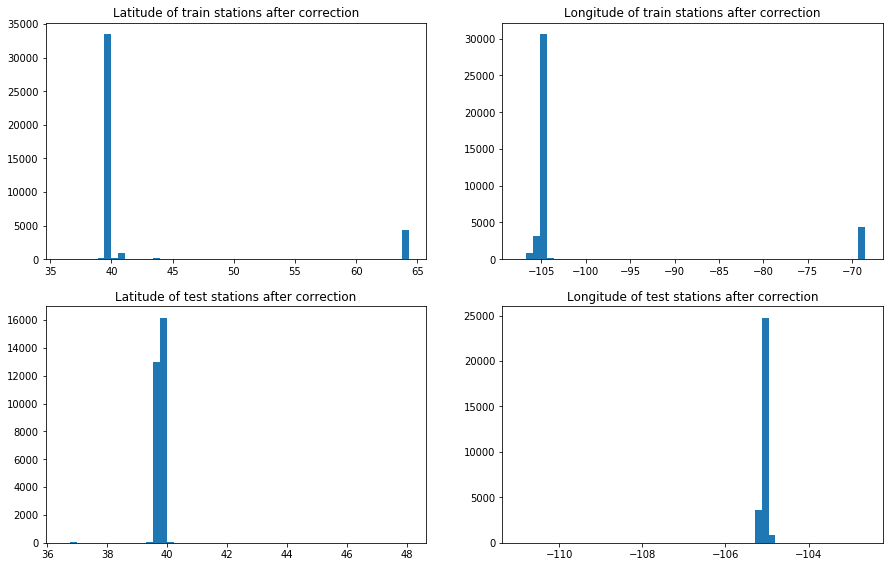

In [26]:
plt.figure(1,figsize=(15,20))

plt.subplot(421)
plt.hist(df_mess_train['bs_lat'], bins=50)
plt.title("Latitude of train stations after correction")

plt.subplot(422)
plt.hist(df_mess_train['bs_lng'], bins=50)
plt.title("Longitude of train stations after correction")

plt.subplot(423)
plt.hist(df_mess_test['bs_lat'], bins=50)
plt.title("Latitude of test stations after correction")

plt.subplot(424)
plt.hist(df_mess_test['bs_lng'], bins=50)
plt.title("Longitude of test stations after correction")
plt.show()

## Correlations

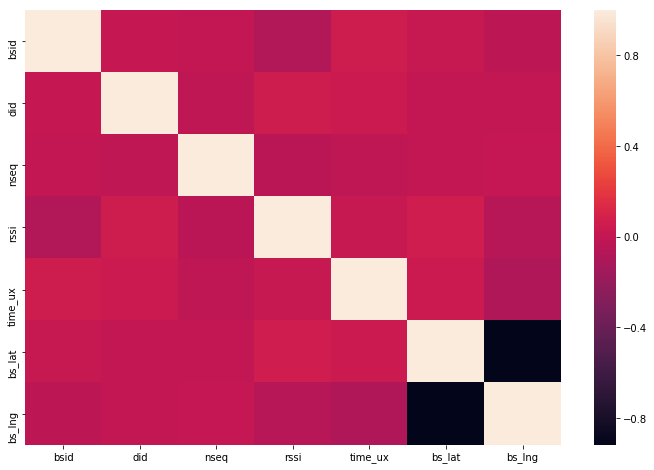

In [141]:
Cor = df_mess_train.drop(['messid'],axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(Cor)
plt.show()

As observed above, the base station locations latitude and longitude are related. However, we observe two other intersting relations between the time_ux and the base stations locations (latitude and longitude)

In [142]:
print(round(np.corrcoef(df_mess_train['time_ux'], df_mess_train['bs_lat'])[0][1],3))

0.04


In [143]:
print(round(np.corrcoef(df_mess_train['time_ux'], df_mess_train['bs_lng'])[0][1],3))

-0.094


## Principal component analysis

In [152]:
def myPCA(df, clusters=None):
    # Normalize data
    df_norm = (df - (df.mean())) / (df.std())
    # PCA
    pca = PCA(n_components=9)
    global pca_res
    pca_res = pca.fit_transform(df_norm.values)
    print("Variance explained : " + str(pca.explained_variance_ratio_.sum()))
    # Ebouli
    plt.figure(figsize=(12,6))
    ebouli = pd.Series(pca.explained_variance_ratio_)
    ebouli.plot(kind='line', title="Scree Plot of the Eigen Values")
    plt.show()
    
    # Circle of correlations
    # http://stackoverflow.com/a/22996786/1565438
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
    plt.figure(figsize=(12,12))
    circleOfCorrelations(pc_infos, ebouli)
    plt.show()
    

    return pc_infos, ebouli

In [145]:
def circleOfCorrelations(pc_infos, ebouli):
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='b', fill=False)
    circle2=plt.Circle((0,0),radius=0.5, color='b', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    fig.gca().add_artist(circle2)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x-0.05,y-0.05))
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")

In [146]:
df_mess_train = pd.concat([df_mess_train, pos_train], axis=1).drop(['messid'], axis=1)

Variance explained : 1.0


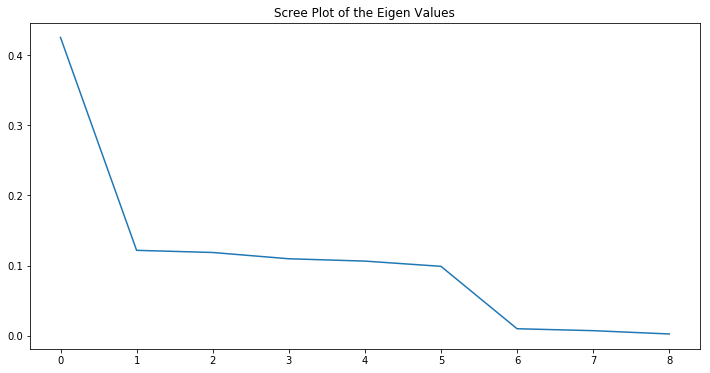

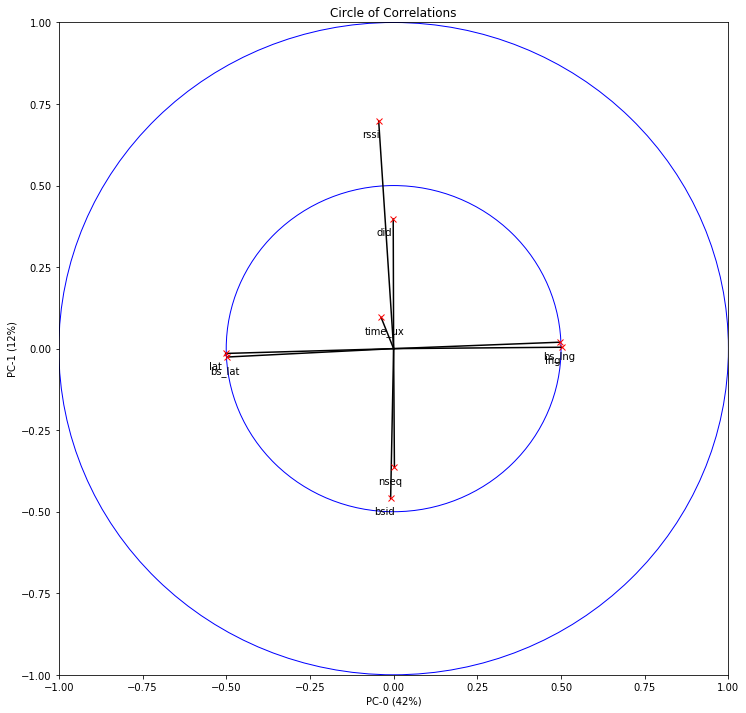

In [153]:
pc_infos, ebouli = myPCA(df_mess_train)

We can see that :
- the latitude and the longitude are obviously highly correlated with the base station coordinates
- the device id is close to uncorrelated to the locations, which seems intuitive
- it is quite similar for the nseq
- the base station id might have some impact on the final location, since it gives us information on where the message has been received. This information is also caught in the base station latitude and longitude.
- the RSSI and the time ux seem to bring some insights, but with confidence for the time_ux. This can be explained by the fact that a slight error in the time-ux means a large error on the estimated distance.
7 dimensions out of the 9 columns are enough to explain 99.04% of the variance. 